In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Step 2: Load dataset
df = pd.read_csv("Flight_Dataset.csv")
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [3]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
df.drop("id", axis=1, inplace=True)

In [2]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [3]:
# Step 4: Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)

In [4]:
df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [10]:
# Step 5: Encode categorical variables using Label Encoding
categorical_features = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [11]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,1,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
103900,1,0,49,0,0,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,1,1,30,0,0,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
103902,0,1,22,0,1,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


In [12]:
# Step 6: Normalize numerical features (excluding the target variable)
scaler = StandardScaler()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Exclude 'satisfaction' from scaling
numerical_features = numerical_features.drop("satisfaction", errors="ignore")

# Apply scaling only to numerical features (excluding 'satisfaction')
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [13]:
df[numerical_features]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.015031,-0.472767,-1.745279,1.490614,2.264618,-0.731539,0.203579,0.616172,0.173776,-1.547323,...,1.183099,1.231704,0.479403,-0.266840,0.311769,0.549799,1.156436,1.305870,0.266393,0.074169
1,1.015031,2.115208,-0.951360,-0.670865,-0.957054,-0.957184,0.203579,-0.695245,0.173776,0.018094,...,-1.849315,-1.769081,-1.849161,1.253380,-0.535045,-1.821012,0.305848,-1.742292,-0.361375,-0.236313
2,-0.985192,-0.472767,-0.885200,-0.670865,-0.957054,-0.047584,-0.549533,-0.695245,-0.541060,-0.764614,...,1.183099,1.231704,0.479403,-0.266840,0.311769,0.549799,0.305848,1.305870,-0.387532,-0.391554
3,-0.985192,-0.472767,-0.951360,-0.670865,-0.957054,-0.629246,-0.549533,1.271880,1.603448,1.583511,...,-1.091211,-1.018885,-1.072973,1.253380,-0.535045,-1.821012,0.305848,-0.980251,-0.099805,-0.158692
4,1.015031,-0.472767,1.430397,-0.670865,-0.957054,-0.978244,0.203579,-0.039537,0.173776,0.018094,...,1.183099,-0.268688,-0.296785,0.493270,0.311769,-0.240472,-0.544740,-0.218211,-0.387532,-0.391554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,-0.985192,2.115208,-1.083680,-0.670865,0.653782,-1.000307,-0.549533,-1.350954,-0.541060,0.018094,...,-1.091211,-1.018885,-0.296785,-1.787061,0.311769,-1.030742,-0.544740,-0.980251,-0.309061,-0.391554
103900,1.015031,-0.472767,0.636478,-0.670865,-0.957054,1.160869,0.956691,0.616172,0.888612,0.800803,...,1.183099,1.231704,1.255590,1.253380,1.158582,1.340069,1.156436,0.543829,-0.387532,-0.391554
103901,1.015031,2.115208,-0.620561,-0.670865,-0.957054,0.807860,-1.302646,-1.350954,-1.255895,0.018094,...,1.183099,0.481508,-0.296785,-1.026951,0.311769,1.340069,1.156436,0.543829,-0.204433,-0.029325
103902,-0.985192,2.115208,-1.149840,-0.670865,0.653782,-0.189991,-1.302646,-1.350954,-1.255895,1.583511,...,-1.849315,-1.769081,0.479403,1.253380,-2.228672,1.340069,0.305848,-1.742292,-0.387532,-0.391554


In [14]:
# Step 7: Split the dataset into features and target
target_column = "satisfaction"  # Change if your target column is different
X = df.drop(columns=[target_column])
y = df[target_column]

In [15]:
X

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.015031,-0.472767,-1.745279,1.490614,2.264618,-0.731539,0.203579,0.616172,0.173776,-1.547323,...,1.183099,1.231704,0.479403,-0.266840,0.311769,0.549799,1.156436,1.305870,0.266393,0.074169
1,1.015031,2.115208,-0.951360,-0.670865,-0.957054,-0.957184,0.203579,-0.695245,0.173776,0.018094,...,-1.849315,-1.769081,-1.849161,1.253380,-0.535045,-1.821012,0.305848,-1.742292,-0.361375,-0.236313
2,-0.985192,-0.472767,-0.885200,-0.670865,-0.957054,-0.047584,-0.549533,-0.695245,-0.541060,-0.764614,...,1.183099,1.231704,0.479403,-0.266840,0.311769,0.549799,0.305848,1.305870,-0.387532,-0.391554
3,-0.985192,-0.472767,-0.951360,-0.670865,-0.957054,-0.629246,-0.549533,1.271880,1.603448,1.583511,...,-1.091211,-1.018885,-1.072973,1.253380,-0.535045,-1.821012,0.305848,-0.980251,-0.099805,-0.158692
4,1.015031,-0.472767,1.430397,-0.670865,-0.957054,-0.978244,0.203579,-0.039537,0.173776,0.018094,...,1.183099,-0.268688,-0.296785,0.493270,0.311769,-0.240472,-0.544740,-0.218211,-0.387532,-0.391554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,-0.985192,2.115208,-1.083680,-0.670865,0.653782,-1.000307,-0.549533,-1.350954,-0.541060,0.018094,...,-1.091211,-1.018885,-0.296785,-1.787061,0.311769,-1.030742,-0.544740,-0.980251,-0.309061,-0.391554
103900,1.015031,-0.472767,0.636478,-0.670865,-0.957054,1.160869,0.956691,0.616172,0.888612,0.800803,...,1.183099,1.231704,1.255590,1.253380,1.158582,1.340069,1.156436,0.543829,-0.387532,-0.391554
103901,1.015031,2.115208,-0.620561,-0.670865,-0.957054,0.807860,-1.302646,-1.350954,-1.255895,0.018094,...,1.183099,0.481508,-0.296785,-1.026951,0.311769,1.340069,1.156436,0.543829,-0.204433,-0.029325
103902,-0.985192,2.115208,-1.149840,-0.670865,0.653782,-0.189991,-1.302646,-1.350954,-1.255895,1.583511,...,-1.849315,-1.769081,0.479403,1.253380,-2.228672,1.340069,0.305848,-1.742292,-0.387532,-0.391554


In [16]:
y

0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 103904, dtype: int64

In [17]:
# Step 8: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


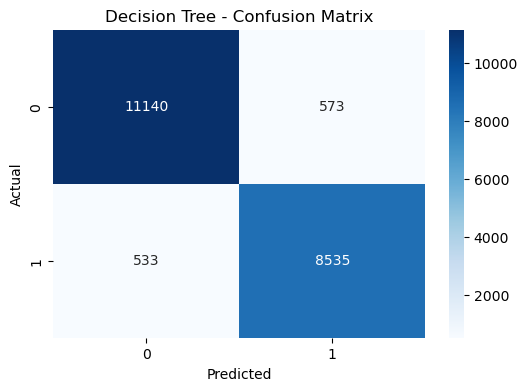

 Decision Tree model - Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     11713
           1       0.94      0.94      0.94      9068

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781



In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Compute Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot the Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Classification Report
print(" Decision Tree model - Classification Report:\n", classification_report(y_test, y_pred_dt))


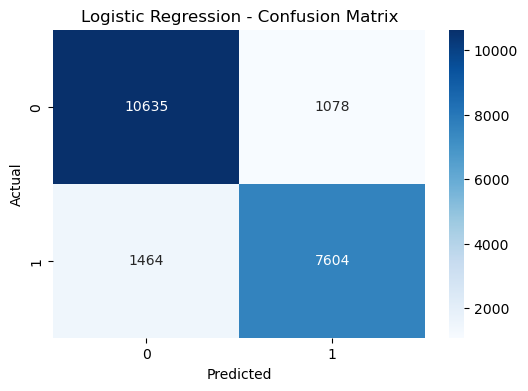

Logistic Regression model - Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89     11713
           1       0.88      0.84      0.86      9068

    accuracy                           0.88     20781
   macro avg       0.88      0.87      0.88     20781
weighted avg       0.88      0.88      0.88     20781



In [30]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Compute Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot the Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Classification Report
print("Logistic Regression model - Classification Report:\n", classification_report(y_test, y_pred_lr))


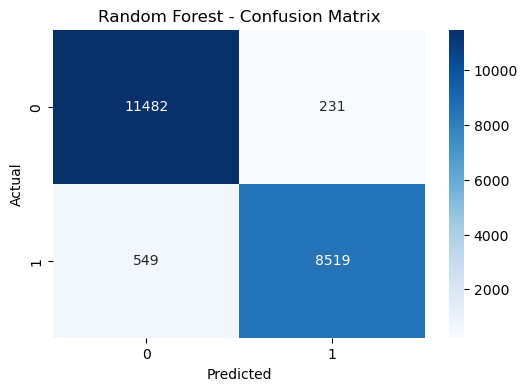

Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



In [23]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Compute Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Random Forest - Classification Report:\n", classification_report(y_test, y_pred_rf))


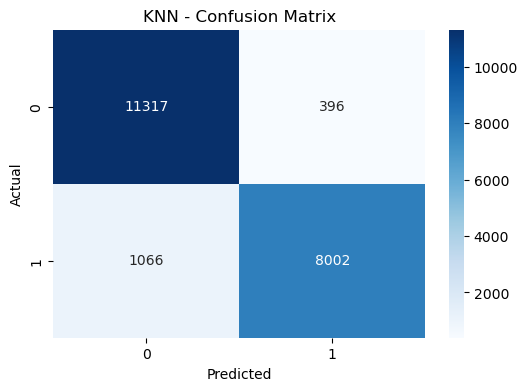

KNN - Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     11713
           1       0.95      0.88      0.92      9068

    accuracy                           0.93     20781
   macro avg       0.93      0.92      0.93     20781
weighted avg       0.93      0.93      0.93     20781



In [31]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Compute Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plot the Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Classification Report
print("KNN - Classification Report:\n", classification_report(y_test, y_pred_knn))



In [5]:
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Compute Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("SVM - Classification Report:\n", classification_report(y_test, y_pred_svm))



NameError: name 'X_train' is not defined

In [40]:
import joblib
joblib.dump(rf_model, "rf_model_trained_model.pkl")  # Replace with your model

['rf_model_trained_model.pkl']